**Aim: To compare the performance of stemming and lemmatization on a text classification task using different machine learning models.**

In [ ]:
import nltk
import random
import pandas as pd

from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import re



nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk

True

In [ ]:
docs = [(movie_reviews.raw(fileid), category)
        for category in movie_reviews.categories()
        for fileid in movie_reviews.fileids(category)]

random.shuffle(docs)
docs = docs[:200]
df = pd.DataFrame(docs, columns=['review', 'label'])
df["label"] = df["label"].map({"pos":1,"neg":0})

In [ ]:
df.head()

,review,label
0,""" my name is jack carter , and you don't want...",0
1,"this is your definitive "" hollywood "" movie , ...",0
2,"ingredients : james bond , scuba scene , car c...",1
3,note : some may consider portions of the follo...,0
4,"the premise is simple , if not bizarre . \na m...",1


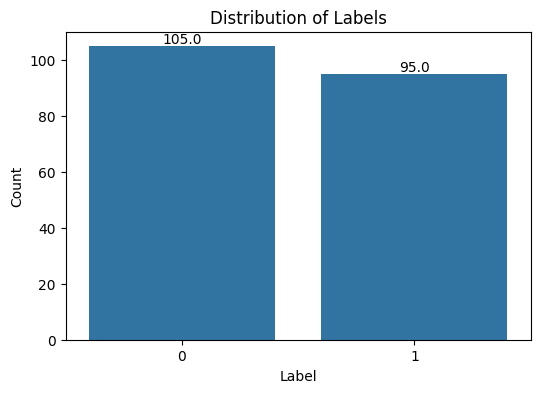

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]', ' ', text)
  return(text)

df["clean"] = df["review"].apply(clean_text)


In [ ]:
df['clean'].head()

,clean
0,my name is jack carter and you don t want...
1,this is your definitive hollywood movie ...
2,ingredients james bond scuba scene car c...
3,note some may consider portions of the follo...
4,the premise is simple if not bizarre \na m...


In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
stop_words = set(stopwords.words('english')) - {"not", "no","never"}

In [ ]:
stemmer = PorterStemmer()
def stem_pipeline(text):
    tokens = word_tokenize(text)
    filtered =[w for w in tokens if not w in stop_words]
    stemmed = [stemmer.stem(w) for w in filtered]
    return " ".join(stemmed)
df["stemmed"] = df["clean"].apply(stem_pipeline)

In [ ]:
df["stemmed"].head()

,stemmed
0,name jack carter want know say brood anti hero...
1,definit hollywood movi extrem predict follow b...
2,ingredi jame bond scuba scene car control cell...
3,note may consid portion follow text spoiler fo...
4,premis simpl not bizarr mad scientist trace be...


In [ ]:
lemmatizer = WordNetLemmatizer()
def lemma_pipeline(text):
  tokens = word_tokenize(text)
  filtered = [w for w in tokens if not w in stop_words]
  pos_tags = pos_tag(filtered)
  lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
  return " ".join(lemmatized)
df["lemmatized"] = df["clean"].apply(lemma_pipeline)

In [ ]:
df["lemmatized"].head()

,lemmatized
0,name jack carter want know say brood anti hero...
1,definitive hollywood movie extremely predictab...
2,ingredient james bond scuba scene car control ...
3,note may consider portion follow text spoiler ...
4,premise simple not bizarre mad scientist trace...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X_stem = df["stemmed"]
X_lemma = df["lemmatized"]
y = df["label"]

In [ ]:
X_stem.head()

,stemmed
0,name jack carter want know say brood anti hero...
1,definit hollywood movi extrem predict follow b...
2,ingredi jame bond scuba scene car control cell...
3,note may consid portion follow text spoiler fo...
4,premis simpl not bizarr mad scientist trace be...


In [ ]:
X_lemma.head()

,lemmatized
0,name jack carter want know say brood anti hero...
1,definitive hollywood movie extremely predictab...
2,ingredient james bond scuba scene car control ...
3,note may consider portion follow text spoiler ...
4,premise simple not bizarre mad scientist trace...


In [ ]:
y.head()

,label
0,0
1,0
2,1
3,0
4,1


In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_stem, y, test_size=0.3, random_state=42)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_lemma, y, test_size=0.3, random_state=42)

In [ ]:
X_train_s.shape

(140,)

In [ ]:
y_train_s.shape

(140,)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_s_vec = vectorizer.fit_transform(X_train_s)
X_test_s_vec = vectorizer.transform(X_test_s)
X_train_l_vec = vectorizer.fit_transform(X_train_l)
X_test_l_vec = vectorizer.transform(X_test_l)

In [ ]:
model_l = LogisticRegression(max_iter=1000)

model_l.fit(X_train_l_vec, y_train_l)

y_pred_l = model_l.predict(X_test_l_vec)

acc_l = accuracy_score(y_test_l, y_pred_l)

print("Lemmatization Accuracy:", round(acc_l, 2))

Lemmatization Accuracy: 0.73


In [ ]:
model_s = LogisticRegression(max_iter=1000)

model_s.fit(X_train_s_vec, y_train_s)

y_pred_s = model_s.predict(X_test_s_vec)

acc_s = accuracy_score(y_test_s, y_pred_s)

print("Stemming Accuracy:", round(acc_l, 2))

Stemming Accuracy: 0.73


In [ ]:
model_l = LogisticRegression(max_iter=1000)
model_l.fit(X_train_l_vec, y_train_s)
y_pred_l = model_l.predict(X_test_l_vec)
acc_l = accuracy_score(y_test_s, y_pred_l)
print("lemmitization  Accuracy:", round(acc_l, 2))

lemmitization  Accuracy: 0.73


In [ ]:
from sklearn.svm import SVC
 # Apply SVM with Stemming
svm_model_s = SVC(kernel='linear')
svm_model_s.fit(X_train_s_vec, y_train_s)
y_pred_svm_s = svm_model_s.predict(X_test_s_vec)
acc_svm_s = accuracy_score(y_test_s, y_pred_svm_s)
print("Stemming SVM Accuracy:", round(acc_svm_s, 2))
# Apply SVM with Lemmatization
svm_model_l = SVC(kernel='linear')
svm_model_l.fit(X_train_l_vec, y_train_s) # Use y_train_s as the labels for the training set
y_pred_svm_l = svm_model_l.predict(X_test_l_vec)
acc_svm_l = accuracy_score(y_test_s, y_pred_svm_l) # Use y_test_s for evaluation
print("Lemmatization SVM Accuracy:", round(acc_svm_l, 2))

Stemming SVM Accuracy: 0.75
Lemmatization SVM Accuracy: 0.75
